In [1]:
%matplotlib inline

from __future__ import absolute_import, print_function, unicode_literals, division
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import random as rand
import copy
from pylab import rcParams

In [2]:
DATA_PATH = '~/data'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH)
print(mnist.data.shape)

(70000, 784)


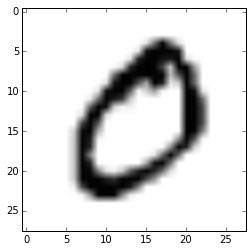

In [3]:
data_array = mnist.data
plt.imshow(data_array[0].reshape(28, 28), cmap = 'Greys')
plt.show()

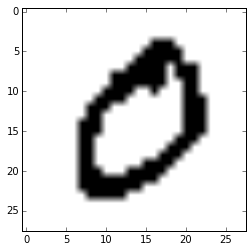

In [4]:
#Convert image to binary matrix
for img in data_array:
    img[img < 100] = 0
    img[img > 0] = 1

plt.imshow(data_array[0].reshape(28, 28), cmap = 'Greys')
plt.show()

In [6]:
class RBM(object):
    """
    Implementation of Restricted Boltzmann Machine for binary prediction
    
    Inputs:
    Data
    Number of hidden and visible states
    Learning rate, default set to 0.1
    
    Outputs:
    Weight matrix
    Epoch number and error
    """

    def __init__(self, data, num_visible, num_hidden, num_epochs, learning_rate=0.1):
        
        self.data = data
        self.num_data = data.shape[0]
        self.num_hidden = num_hidden
        self.num_visible = num_visible
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # weight matrix first row and first column represent the bias
        self.weights = np.random.rand(self.num_visible, self.num_hidden) 
        self.weights = np.insert(self.weights, 0, 0, axis = 0)
        self.weights = np.insert(self.weights, 0, 0, axis = 1)
    
    def _sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def _gen_prob(self,a,b):
        return self._sigmoid(np.dot(a,b))
    
    def _gen_assoc(self,a):
        probs = self._gen_prob(a,self.weights)
        return np.dot(a.T,probs)

    def CDk(self):
        max_epochs = self.num_epochs + 1
        self.data = np.insert(self.data, 0, 1, axis=1)
        
        error_array = []
        
        for epoch in xrange(0, max_epochs):
            up_probs = self._gen_prob(self.data,self.weights)
            up_associations = self._gen_assoc(self.data)
            up_states = up_probs > np.random.rand(self.num_data, self.num_hidden + 1)
            
            down_probs = self._gen_prob(up_states,self.weights.T)
            down_probs[:,0] = 1 
            down_associations = self._gen_assoc(down_probs)
            
            self.weights += self.learning_rate * \
                ((up_associations - down_associations)/self.num_data)
                
            error = np.sum((self.data - down_probs) ** 2)
            error_array.append(error)
            print("Epoch: ", epoch, ", Error: ", error)
            
            if epoch == self.num_epochs:
                return down_probs, error_array
               

In [7]:
def rbm_and_plot(data, num_hidden, epochs, learning_rate=.3):
    num_visible = data.shape[1]
    r = RBM(data, num_visible, num_hidden, epochs, learning_rate)
    sample = r.CDk()
    
    f = plt.subplots(10,5, figsize=(15,15))
    f[1][0,0].set_title("Original Image", fontsize=18).set_position([.5, 1.35])
    f[1][0,1].set_title("RBM Probabilities", fontsize=18).set_position([.5, 1.35])
    f[1][0,2].set_title("RBM Sample 1", fontsize=18).set_position([.5, 1.35])
    f[1][0,3].set_title("RBM Sample 2", fontsize=18).set_position([.5, 1.35])
    f[1][0,4].set_title("RBM Sample 3", fontsize=18).set_position([.5, 1.35])

    images = [11, 12002, 15005, 19005, 28005, 32005, 39007, 43004, 49010, 58030]

    for i in xrange(0, 10):
        for j in xrange(0, 5):
            if j == 0:
                f[1][i, j].imshow(data_array[images[i]].reshape(28, 28), cmap="Greys")
            elif j == 1:
                f[1][i, j].imshow(sample[0][images[i]][1:].reshape(28,28), cmap="Greys")            
            else:
                s = sample[0][images[i]][1:].reshape(28,28)
                img = s > np.random.rand(s.shape[0], s.shape[1]) 
                f[1][i, j].imshow(img, cmap="Greys")

            f[1][i, j].get_xaxis().set_visible(False)
            f[1][i, j].get_yaxis().set_visible(False)

    plt.suptitle("RBM Trained on MNIST Dataset", fontsize=25)
    plt.show()
    
    rcParams['figure.figsize'] = 5, 5
    err = sample[1]
    plt.plot(err)
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.title("Error over Epochs")
    plt.show()

Epoch:  0 , Error:  47051393.0
Epoch:  1 , Error:  47051392.9354
Epoch:  2 , Error:  7444833.69124


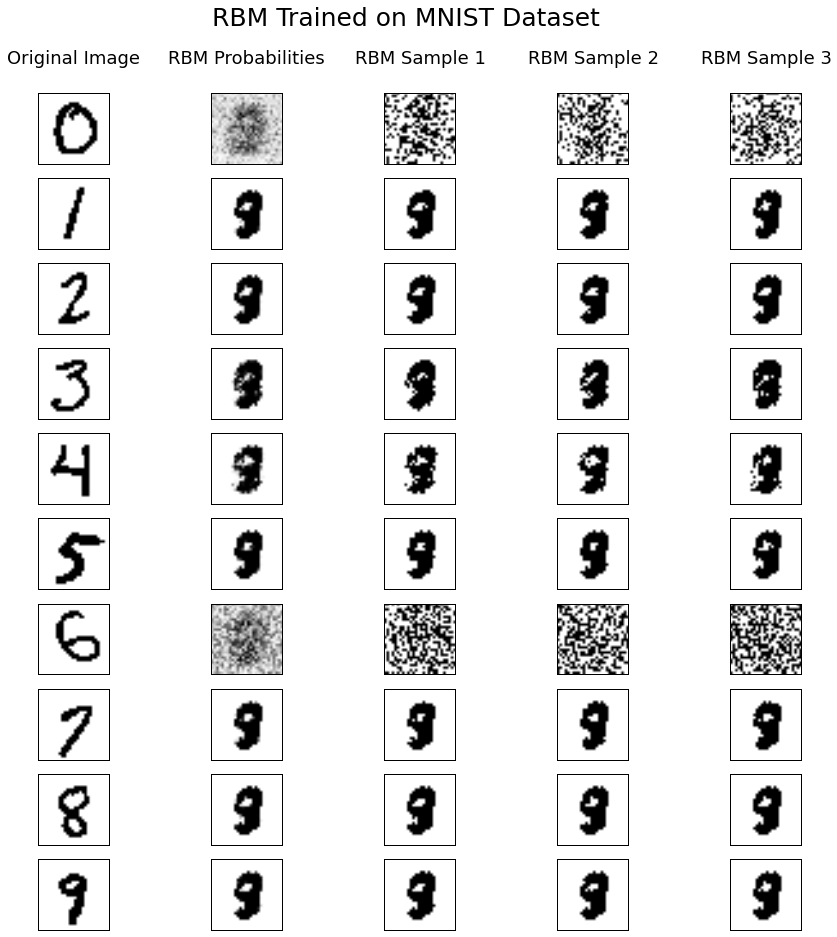

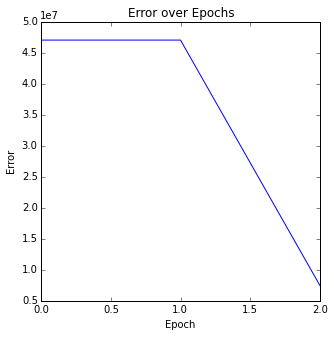

In [9]:
rbm_and_plot(data_array, 300, 2, learning_rate=.4)